In [1]:
from os.path import join
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# load shapefiles
path_e_highway_sev2 = join('C:\\Users\\r.beer\\code\\FINE\\examples\\EU_without_aggregation\\InputData\\SpatialData\\'
                           'ShapeFiles\\e-highway_sev2.shp')
# path_e_highway_sev_full = join('C:\\Users\\r.beer\\code\\FINE\\examples\\EU_without_aggregation\\InputData\\'
#                                'SpatialData\\ShapeFiles\\e-highway_sev-full.shp')

e_highway_sev2 = gpd.read_file(path_e_highway_sev2)
# path_e_highway_sev_full = gpd.read_file(path_e_highway_sev_full)


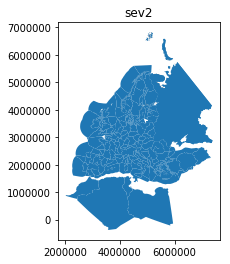

In [3]:
e_highway_sev2.plot()
plt.title('sev2')
# path_e_highway_sev_full.plot()
# plt.title('sev-full')

plt.show()

In [ ]:
# buffering the data to avoid intersections:
e_highway_sev2_buffered_001 = e_highway_sev2
e_highway_sev2_buffered_001['geometry'] = e_highway_sev2_buffered_001.buffer(0.01)

In [ ]:
e_highway_sev2_buffered_001.dissolve(by='Germany').plot()

In [ ]:
e_highway_sev2_buffered_001.columns

In [3]:
# read natural earth data
import geopandas as gpd
shape_path = 'InputData/SpatialData/ShapeFiles/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
admin0_countries_shapes = gpd.read_file(shape_path)
admin0_countries_shapes.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,(POLYGON ((117.7036079039552 4.163414542001791...
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,(POLYGON ((117.7036079039552 4.163414542001791...
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,POLYGON ((-69.51008875199994 -17.5065881979999...
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,(POLYGON ((-69.51008875199994 -17.506588197999...


In [4]:
admin0_countries_shapes[admin0_countries_shapes['SOV_A3'].isin(e_highway_sev2.ISO.unique())].head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
44,Admin-0 country,0,5,Lithuania,LTU,0,2,Sovereign country,Lithuania,LTU,...,리투아니아,Litouwen,Litwa,Lituânia,Литва,Litauen,Litvanya,Litva,立陶宛,(POLYGON ((26.59453129100007 55.66699086600006...
49,Admin-0 country,0,5,Czechia,CZE,0,2,Sovereign country,Czechia,CZE,...,체코,Tsjechië,Czechy,República Checa,Чехия,Tjeckien,Çek Cumhuriyeti,Cộng hòa Séc,捷克,"POLYGON ((14.81039270000014 50.85844716400005,..."
50,Admin-0 country,0,2,Germany,DEU,0,2,Sovereign country,Germany,DEU,...,독일,Duitsland,Niemcy,Alemanha,Германия,Tyskland,Almanya,Đức,德国,(POLYGON ((13.81572473100007 48.76643015600006...
51,Admin-0 country,0,6,Estonia,EST,0,2,Sovereign country,Estonia,EST,...,에스토니아,Estland,Estonia,Estónia,Эстония,Estland,Estonya,Estonia,爱沙尼亚,(POLYGON ((24.30615873423829 57.86818625584296...
52,Admin-0 country,0,5,Latvia,LVA,0,2,Sovereign country,Latvia,LVA,...,라트비아,Letland,Łotwa,Letónia,Латвия,Lettland,Letonya,Latvia,拉脫維亞,"POLYGON ((27.35293461100014 57.52760081000012,..."


In [5]:
european_countries_list = list(e_highway_sev2.ISO.unique())
european_countries_list_without_turkey = [country for country in european_countries_list if country not in ['TUR', 'None']]
european_countries_list_without_turkey

['ESP',
 'PRT',
 'FRA',
 'BEL',
 'LUX',
 'NLD',
 'DEU',
 'DNK',
 'CZE',
 'POL',
 'SVK',
 'CHE',
 'AUT',
 'ITA',
 'SVN',
 'HUN',
 'ROU',
 'HRV',
 'BIH',
 'MNE',
 'SRB',
 'BGR',
 'MKD',
 'GRC',
 'ALB',
 'EST',
 'FIN',
 'LTU',
 'LVA',
 'NOR',
 'SWE',
 'GBR',
 'IRL']

In [6]:
country_abbrev_list = ['es', 'pt', 'fr', 'be', 'lu', 'nl', 'de', 'dk', 'cz', 'pl', 'sk', 'ch', 'at', 'it', 'si', 'hu', 'ro', 'hr', 'ba', 'me', 'rs', 'bg', 'mk', 'gr', 'al', 'ee', 'fi', 'lt', 'lv', 'no', 'se', 'uk', 'ie']

country_dict = dict(zip(european_countries_list_without_turkey, country_abbrev_list))
country_dict

{'ESP': 'es',
 'PRT': 'pt',
 'FRA': 'fr',
 'BEL': 'be',
 'LUX': 'lu',
 'NLD': 'nl',
 'DEU': 'de',
 'DNK': 'dk',
 'CZE': 'cz',
 'POL': 'pl',
 'SVK': 'sk',
 'CHE': 'ch',
 'AUT': 'at',
 'ITA': 'it',
 'SVN': 'si',
 'HUN': 'hu',
 'ROU': 'ro',
 'HRV': 'hr',
 'BIH': 'ba',
 'MNE': 'me',
 'SRB': 'rs',
 'BGR': 'bg',
 'MKD': 'mk',
 'GRC': 'gr',
 'ALB': 'al',
 'EST': 'ee',
 'FIN': 'fi',
 'LTU': 'lt',
 'LVA': 'lv',
 'NOR': 'no',
 'SWE': 'se',
 'GBR': 'uk',
 'IRL': 'ie'}

In [8]:
countries = admin0_countries_shapes[admin0_countries_shapes['TYPE'].isin(['Sovereign country', 'Country'])]
countries.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,(POLYGON ((117.7036079039552 4.163414542001791...
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,(POLYGON ((117.7036079039552 4.163414542001791...
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,POLYGON ((-69.51008875199994 -17.5065881979999...
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,(POLYGON ((-69.51008875199994 -17.506588197999...


In [9]:
european_countries = countries[countries['ADM0_A3'].isin(european_countries_list_without_turkey)]
print(len(european_countries))

list(european_countries['ADM0_A3'].values)
european_countries['abbrev'] = [country_dict[ISO] for ISO in list(european_countries['ADM0_A3'].values)]

len(european_countries)



33


C:\Users\r.beer\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


33

In [10]:
european_country_shape_path = 'InputData/SpatialData/ShapeFiles/european_countries/european_countries.shp'
european_countries.to_file(european_country_shape_path)


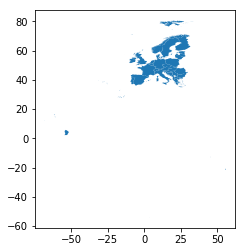

In [11]:
ax = european_countries.plot()


(0, 0.5)

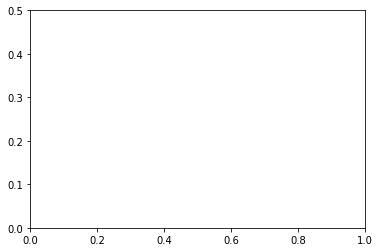

In [12]:
fig, ax = plt.subplots(1,1)
ax.set_ylim(0, 0.5)

In [14]:
european_countries['centroids'] = european_countries.geometry.centroid



C:\Users\r.beer\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
shape_path = 'InputData/SpatialData/ShapeFiles/no data/buses.shp'
bus_shapes = gpd.read_file(shape_path)
bus_shapes.head()

,v_nom,type,carrier,v_mag_pu_s,v_mag_pu_m,v_mag_pu_1,control,sub_networ,index,geometry
0,1.0,None,AC,1.0,0.0,inf,PQ,0,cluster_0,POINT (4305174.296791757 3425090.394773121)
1,1.0,None,AC,1.0,0.0,inf,PQ,0,cluster_1,POINT (4201151.967901286 2889500.035888917)
2,1.0,None,AC,1.0,0.0,inf,PQ,0,cluster_2,POINT (4109180.546372826 3122176.982566078)
3,1.0,None,AC,1.0,0.0,inf,PQ,0,cluster_3,POINT (4372468.94538855 3162030.739857901)
4,1.0,None,AC,1.0,0.0,inf,PQ,0,cluster_4,POINT (4199587.250354704 3264719.920533253)


In [21]:
shape_path = 'InputData/SpatialData/ShapeFiles/no data/AClines.shp'
AC_lines = gpd.read_file(shape_path)
AC_lines.head()

,bus0,bus1,s_nom,x,geometry
0,cluster_0,cluster_3,3422.532396,29.091399,LINESTRING (4305174.296791757 3425090.39477312...
1,cluster_0,cluster_4,4660.948723,11.022235,LINESTRING (4305174.296791757 3425090.39477312...
2,cluster_0,cluster_5,3422.532396,35.097946,LINESTRING (4305174.296791757 3425090.39477312...
3,cluster_1,cluster_2,12721.913182,7.309282,LINESTRING (4201151.967901286 2889500.03588891...
4,cluster_1,cluster_3,6845.064792,17.942666,LINESTRING (4201151.967901286 2889500.03588891...


In [22]:
shape_path = 'InputData/SpatialData/ShapeFiles/no data/clusteredRegions.shp'
regions_shapes = gpd.read_file(shape_path)
regions_shapes.head()

,index,geometry
0,cluster_0,(POLYGON ((4424359.129202704 3444705.448314082...
1,cluster_1,(POLYGON ((4223496.091538507 2734368.142914435...
2,cluster_2,(POLYGON ((4044995.353409454 2987370.953005805...
3,cluster_3,(POLYGON ((4479226.754456425 3008201.761662457...
4,cluster_4,(POLYGON ((4106781.294856485 3394915.766633345...
